In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


In [266]:
df = pd.read_excel(r'G:\내 드라이브\DATASET\Kakao\crypto_data\CryptoCurrency_Coinmarketcap.xlsx', None, index_col=0 )
df_names = list(df.keys())
print(df_names)

['rtn', 'mktrtn', 'szrtn', 'prrtn', 'maxprrtn', 'momrtn', 'tvolrtn', 'stvolrtn', 'volrtn', 'smrtn']


In [267]:
mktrtn = df['mktrtn']
mktrtn

,mktrtn
2013-04-28,NaN
2013-04-29,0.074112
2013-04-30,-0.037085
2013-05-01,-0.156481
2013-05-02,-0.101495
...,...
2023-08-24,-0.009873
2023-08-25,-0.003491
2023-08-26,-0.001991
2023-08-27,0.004150


In [268]:
szrtn = df['szrtn']
szrtn

,Bigv,2v,3v,4v,Smallv,BMSv,Bige,2e,3e,4e,Smalle,BMSe
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24,-0.009865,-0.010368,-0.012330,-0.006393,-0.005008,-0.004857,-0.016538,-0.007455,-0.013172,-0.005134,-0.006599,-0.009938
2023-08-25,-0.003500,-0.002473,-0.001282,-0.007949,-0.011954,0.008454,-0.006802,-0.002198,0.000373,-0.011455,-0.009644,0.002842
2023-08-26,-0.001994,-0.000717,-0.003690,-0.006872,0.004203,-0.006197,-0.001655,0.000936,-0.003054,-0.006303,0.001990,-0.003645
2023-08-27,0.004136,0.003389,0.002122,0.025937,0.005441,-0.001305,0.002894,0.004780,0.001672,0.023259,0.005030,-0.002137


In [269]:
szrtn = df['szrtn']
szrtn = szrtn[['BMSv', 'BMSe']]
szrtn

,BMSv,BMSe
2013-04-28,NaN,NaN
2013-04-29,NaN,NaN
2013-04-30,NaN,NaN
2013-05-01,NaN,NaN
2013-05-02,NaN,NaN
...,...,...
2023-08-24,-0.004857,-0.009938
2023-08-25,0.008454,0.002842
2023-08-26,-0.006197,-0.003645
2023-08-27,-0.001305,-0.002137


In [270]:
prrtn = df['prrtn']
prrtn = prrtn[['HMLv','HMLe']]
prrtn.rename(columns={'HMLv': 'prrtn_v', 'HMLe': 'prrtn_e'}, inplace=True)
prrtn

C:\Users\boyu571\AppData\Local\Temp\ipykernel_18756\3265219190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prrtn.rename(columns={'HMLv': 'prrtn_v', 'HMLe': 'prrtn_e'}, inplace=True)


,prrtn_v,prrtn_e
2013-04-28,NaN,NaN
2013-04-29,NaN,NaN
2013-04-30,NaN,NaN
2013-05-01,NaN,NaN
2013-05-02,NaN,NaN
...,...,...
2023-08-24,0.010212,-0.002420
2023-08-25,0.005965,-0.006634
2023-08-26,-0.001083,-0.001476
2023-08-27,-0.000190,-0.020889


In [271]:
maxprrtn = df['maxprrtn']
maxprrtn = maxprrtn[['MMLv','MMLe']]
maxprrtn.rename(columns={'MMLv': 'maxprrtn_v', 'MMLe': 'maxprrtn_e'}, inplace=True)
maxprrtn

C:\Users\boyu571\AppData\Local\Temp\ipykernel_18756\1185732516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maxprrtn.rename(columns={'MMLv': 'maxprrtn_v', 'MMLe': 'maxprrtn_e'}, inplace=True)


,maxprrtn_v,maxprrtn_e
2013-04-28,NaN,NaN
2013-04-29,NaN,NaN
2013-04-30,NaN,NaN
2013-05-01,NaN,NaN
2013-05-02,NaN,NaN
...,...,...
2023-08-24,-0.001389,-0.009783
2023-08-25,0.000721,0.006440
2023-08-26,0.001756,-0.001534
2023-08-27,0.003091,0.018340


In [272]:
momrtn = df['momrtn']
momrtn = momrtn[['WMLv','WMLe']]
momrtn.rename(columns={'WMLv': 'momrtn_v', 'WMLe': 'momrtn_e'}, inplace=True)
momrtn

C:\Users\boyu571\AppData\Local\Temp\ipykernel_18756\3170707739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  momrtn.rename(columns={'WMLv': 'momrtn_v', 'WMLe': 'momrtn_e'}, inplace=True)


,momrtn_v,momrtn_e
2013-04-28,NaN,NaN
2013-04-29,NaN,NaN
2013-04-30,NaN,NaN
2013-05-01,NaN,NaN
2013-05-02,NaN,NaN
...,...,...
2023-08-24,0.008904,-0.011940
2023-08-25,-0.002337,-0.000734
2023-08-26,-0.005201,-0.010268
2023-08-27,-0.007954,0.014800


In [273]:
tvolrtn = df['tvolrtn']
tvolrtn = tvolrtn[['HMLv','HMLe']]
tvolrtn.rename(columns={'HMLv': 'tvolrtn_v', 'HMLe': 'tvolrtn_e'}, inplace=True)
tvolrtn

C:\Users\boyu571\AppData\Local\Temp\ipykernel_18756\1747554131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvolrtn.rename(columns={'HMLv': 'tvolrtn_v', 'HMLe': 'tvolrtn_e'}, inplace=True)


,tvolrtn_v,tvolrtn_e
2013-04-28,NaN,NaN
2013-04-29,NaN,NaN
2013-04-30,NaN,NaN
2013-05-01,NaN,NaN
2013-05-02,NaN,NaN
...,...,...
2023-08-24,-0.026841,-0.007594
2023-08-25,-0.009185,0.001544
2023-08-26,0.004059,0.002031
2023-08-27,-0.002179,-0.019756


In [274]:
stvolrtn = df['stvolrtn']
stvolrtn = stvolrtn[['HMLv','HMLe']]
stvolrtn.rename(columns={'HMLv': 'stvolrtn_v', 'HMLe': 'stvolrtn_e'}, inplace=True)
stvolrtn

C:\Users\boyu571\AppData\Local\Temp\ipykernel_18756\3967461303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stvolrtn.rename(columns={'HMLv': 'stvolrtn_v', 'HMLe': 'stvolrtn_e'}, inplace=True)


,stvolrtn_v,stvolrtn_e
2013-04-28,NaN,NaN
2013-04-29,NaN,NaN
2013-04-30,NaN,NaN
2013-05-01,NaN,NaN
2013-05-02,NaN,NaN
...,...,...
2023-08-24,0.022974,0.002784
2023-08-25,0.004061,-0.003887
2023-08-26,-0.001887,-0.003572
2023-08-27,-0.010561,0.014058


In [275]:
volrtn = df['volrtn']
volrtn = volrtn[['HMLv','HMLe']]
volrtn.rename(columns={'HMLv': 'volrtn_v', 'HMLe': 'volrtn_e'}, inplace=True)
volrtn

C:\Users\boyu571\AppData\Local\Temp\ipykernel_18756\2896164434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volrtn.rename(columns={'HMLv': 'volrtn_v', 'HMLe': 'volrtn_e'}, inplace=True)


,volrtn_v,volrtn_e
2013-04-28,NaN,NaN
2013-04-29,NaN,NaN
2013-04-30,NaN,NaN
2013-05-01,NaN,NaN
2013-05-02,NaN,NaN
...,...,...
2023-08-24,0.010169,-0.008109
2023-08-25,0.004785,0.009493
2023-08-26,0.007010,-0.003715
2023-08-27,0.003573,0.016204


In [276]:
smrtn = df['smrtn']
smrtn = smrtn[['CSZv','CMOMv', 'CSZe', 'CMOMe']]
smrtn

,CSZv,CMOMv,CSZe,CMOMe
2013-04-28,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-08-24,0.004224,-0.004570,-0.002047,-0.011680
2023-08-25,0.000284,-0.008396,0.003726,-0.014293
2023-08-26,0.002878,-0.004730,0.001352,-0.006900
2023-08-27,-0.006686,-0.023391,-0.008265,-0.022441


In [277]:
# 데이터프레임을 열 방향으로 결합
combined_df = pd.concat([mktrtn, szrtn, prrtn, maxprrtn, momrtn, tvolrtn, stvolrtn, volrtn, smrtn], axis=1)

# 결과 확인
print(combined_df)

              mktrtn      BMSv      BMSe   prrtn_v   prrtn_e  maxprrtn_v  \
2013-04-28       NaN       NaN       NaN       NaN       NaN         NaN   
2013-04-29  0.074112       NaN       NaN       NaN       NaN         NaN   
2013-04-30 -0.037085       NaN       NaN       NaN       NaN         NaN   
2013-05-01 -0.156481       NaN       NaN       NaN       NaN         NaN   
2013-05-02 -0.101495       NaN       NaN       NaN       NaN         NaN   
...              ...       ...       ...       ...       ...         ...   
2023-08-24 -0.009873 -0.004857 -0.009938  0.010212 -0.002420   -0.001389   
2023-08-25 -0.003491  0.008454  0.002842  0.005965 -0.006634    0.000721   
2023-08-26 -0.001991 -0.006197 -0.003645 -0.001083 -0.001476    0.001756   
2023-08-27  0.004150 -0.001305 -0.002137 -0.000190 -0.020889    0.003091   
2023-08-28 -0.000746  0.008775  0.004345  0.011870  0.005101   -0.008293   

            maxprrtn_e  momrtn_v  momrtn_e  tvolrtn_v  tvolrtn_e  stvolrtn_v  \
2013-04

In [278]:
combined_df.columns

Index(['mktrtn', 'BMSv', 'BMSe', 'prrtn_v', 'prrtn_e', 'maxprrtn_v',
       'maxprrtn_e', 'momrtn_v', 'momrtn_e', 'tvolrtn_v', 'tvolrtn_e',
       'stvolrtn_v', 'stvolrtn_e', 'volrtn_v', 'volrtn_e', 'CSZv', 'CMOMv',
       'CSZe', 'CMOMe'],
      dtype='object')

In [279]:
sentiment = pd.read_csv('eng_sentiment_daily.csv')
sentiment

,date,score_full,score_full_std,count,score_title,score_title_std,score_content,score_content_std
0,2017-11-10,0.045833,0.654594,48,-0.089583,0.714959,0.293750,0.473289
1,2017-11-11,-0.019048,0.599682,21,0.238095,0.449974,-0.171429,0.589188
2,2017-11-12,0.215385,0.439405,13,0.161538,0.559074,0.238462,0.327970
3,2017-11-13,0.177551,0.600439,49,0.185714,0.557898,0.108163,0.556715
4,2017-11-14,0.123404,0.639705,47,0.212766,0.581459,0.138298,0.541958
...,...,...,...,...,...,...,...,...
2146,2023-09-26,0.313235,0.504873,68,0.234783,0.494626,0.367647,0.402767
2147,2023-09-27,0.273973,0.575670,73,0.287671,0.596505,0.212329,0.549734
2148,2023-09-28,0.337879,0.515533,66,0.327273,0.480879,0.318182,0.448899
2149,2023-09-29,0.236765,0.667118,68,0.325000,0.575462,0.252941,0.596875


In [280]:
# combined_df의 인덱스를 datetime으로 변환하고 열로 변환
combined_df['date'] = pd.to_datetime(combined_df.index, format="%Y-%m-%d %H:%M:%S")
# combined_df.drop('index', axis=1, inplace=True)

# sentiment 데이터프레임의 'date' 열을 datetime으로 변환
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# 날짜를 기준으로 두 데이터프레임을 병합
merged_df = pd.merge(combined_df, sentiment, on='date', how='inner')

# 결과 확인
merged_df.columns

Index(['mktrtn', 'BMSv', 'BMSe', 'prrtn_v', 'prrtn_e', 'maxprrtn_v',
       'maxprrtn_e', 'momrtn_v', 'momrtn_e', 'tvolrtn_v', 'tvolrtn_e',
       'stvolrtn_v', 'stvolrtn_e', 'volrtn_v', 'volrtn_e', 'CSZv', 'CMOMv',
       'CSZe', 'CMOMe', 'date', 'score_full', 'score_full_std', 'count',
       'score_title', 'score_title_std', 'score_content', 'score_content_std'],
      dtype='object')

In [282]:
from statsmodels.stats.stattools import durbin_watson

# 각 변수에 대한 Durbin-Watson 통계 계산
dw_stats = {}
for column in X.columns:
    dw_stats[column] = durbin_watson(X[column])

# 자기상관성이 의심되는 변수 식별
suspicious_autocorrelation = {k: v for k, v in dw_stats.items() if v < 1.5 or v > 2.5}
print("자기상관성이 의심되는 변수들:", suspicious_autocorrelation)


자기상관성이 의심되는 변수들: {'score_full': 0.24144319281109314, 'score_full_std': 0.04692441511762742, 'count': 0.13486490867451137, 'score_title': 0.3995874098067541, 'score_title_std': 0.03316199758903515, 'score_content': 0.2662941944707291, 'score_content_std': 0.042235361694139606}


In [283]:
# 첫 번째 차분 계산
merged_df['diff_score_full'] = merged_df['score_full'].diff()
merged_df['diff_score_title'] = merged_df['score_title'].diff()
merged_df['diff_score_content'] = merged_df['score_content'].diff()
merged_df['diff_score_full_std'] = merged_df['score_full_std'].diff()
merged_df['diff_score_title_std'] = merged_df['score_title'].diff()
merged_df['diff_score_content_std'] = merged_df['score_content_std'].diff()
merged_df['diff_count'] = merged_df['count'].diff()

# 결측값 제거
merged_df.dropna(inplace=True)

In [240]:
# merged_df.set_index('date', inplace=True)

merged_df.columns

Index(['mktrtn', 'BMSv', 'BMSe', 'prrtn_v', 'prrtn_e', 'maxprrtn_v', 'MMLe',
       'momrtn_v', 'momrtn_e', 'tvolrtn_v', 'tvolrtn_e', 'stvolrtn_v',
       'stvolrtn_e', 'volrtn_v', 'volrtn_e', 'CSZv', 'CMOMv', 'CSZe', 'CMOMe',
       'date', 'score_full', 'score_full_std', 'count', 'score_title',
       'score_title_std', 'score_content', 'score_content_std',
       'diff_score_full', 'diff_score_title', 'diff_score_content',
       'diff_score_full_std', 'diff_score_title_std', 'diff_score_content_std',
       'diff_count'],
      dtype='object')

In [183]:
merged_df

,mktrtn,BMSv,BMSe,prrtn_v,prrtn_e,maxprrtn_v,MMLe,momrtn_v,momrtn_e,tvolrtn_v,...,score_title_std,score_content,score_content_std,normalized_index,diff_score_full,diff_score_title,diff_score_content,diff_score_full_std,diff_score_title_std,diff_score_content_std
1,0.019478,0.004318,0.023622,-0.043298,0.015322,0.136055,0.001798,-0.029503,-0.014307,0.038308,...,0.490405,0.309836,0.535943,0.1818,0.073674,0.157184,0.062777,0.023131,0.157184,-0.009177
2,0.008524,0.015405,0.035980,-0.053261,-0.523240,0.159455,-0.009703,-0.055957,-0.561346,-0.000040,...,0.565302,0.268000,0.561041,0.2094,-0.076262,-0.102361,-0.041836,0.027970,-0.102361,0.025098
3,0.003527,-0.012702,-0.017199,-0.000617,-0.001603,0.047361,0.022411,0.006324,-0.025592,-0.000587,...,0.486257,0.238462,0.538945,0.2156,0.101231,0.030923,-0.029538,-0.138410,0.030923,-0.022096
4,0.014356,-0.009069,-0.006878,0.033568,-0.003578,0.039851,0.014609,0.041924,0.012600,0.001543,...,0.545493,0.305455,0.423573,0.2174,-0.012867,-0.121469,0.066993,-0.042431,-0.121469,-0.115372
5,-0.010571,-0.000848,-0.001917,-0.058031,-0.566383,-0.019600,0.542046,-0.037400,-0.585410,-0.001672,...,0.490973,0.400000,0.499166,0.2190,0.068126,0.219035,0.094545,0.091966,0.219035,0.075593
6,-0.014641,0.001364,-0.013135,0.011857,0.001950,-0.092911,-0.014265,-0.051630,-0.009802,0.004982,...,0.488650,0.274627,0.534093,0.2550,-0.045385,-0.121505,-0.125373,-0.001689,-0.121505,0.034927
7,-0.019686,0.001861,-0.004052,0.010084,0.000118,0.033677,-0.010955,0.029320,-0.020261,-0.023623,...,0.570682,0.239130,0.574768,0.1828,-0.113887,-0.072550,-0.035496,0.066887,-0.072550,0.040675
8,0.015272,0.004425,0.001680,-0.002847,-0.005165,0.064776,0.004422,0.051001,-0.027297,-0.023245,...,0.547872,0.229508,0.558374,0.1824,0.052815,0.067926,-0.009622,-0.042386,0.067926,-0.016394
9,-0.008152,-0.043075,-0.054742,-0.023788,-0.011304,-0.205807,0.013220,-0.150246,-0.055994,-0.022048,...,0.517092,0.353846,0.334940,0.1162,0.181967,0.055485,0.124338,-0.281620,0.055485,-0.223434
10,-0.004226,0.003839,0.006218,-0.003031,0.003004,-0.015821,-0.008506,-0.005082,-0.019924,-0.007207,...,0.591715,0.273333,0.461581,0.1496,-0.044828,0.002821,-0.080513,0.190201,0.002821,0.126642


                            OLS Regression Results                            
Dep. Variable:                 mktrtn   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.025
Date:                Mon, 20 Nov 2023   Prob (F-statistic):            0.00926
Time:                        16:34:53   Log-Likelihood:                 3789.6
No. Observations:                2077   AIC:                            -7545.
Df Residuals:                    2060   BIC:                            -7449.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0019      0.01

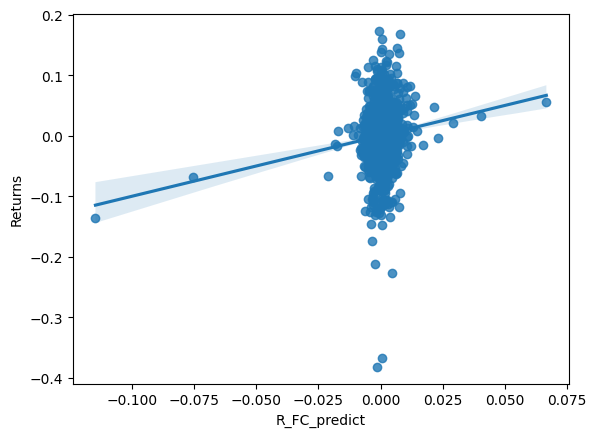

In [290]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 종속변수 설정
Returns = merged_df['mktrtn']

# 독립변수 설정 및 한 시점 이동
X = merged_df[[ 'BMSe', 'prrtn_e', 'maxprrtn_e', 
       'momrtn_e',  'tvolrtn_e', 'stvolrtn_e',
        'volrtn_e',  'CSZe', 'CMOMe', 
       'score_full', 'score_full_std', 'count', 'score_title',
       'score_title_std', 'score_content', 'score_content_std']].shift(1)

# 결측값 제거
X = X.dropna()
Returns = Returns[X.index]

# OLS 회귀모델 적합
model = sm.OLS(Returns, sm.add_constant(X))
result = model.fit()

# 결과 출력
print(result.summary())

# 예측값 계산 및 그래프 그리기
R_FC_predict = result.predict()
sns.regplot(x=R_FC_predict, y=Returns, fit_reg=True)
plt.xlabel("R_FC_predict")
plt.ylabel("Returns")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 mktrtn   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.253
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.30e-19
Time:                        16:34:56   Log-Likelihood:                 3789.6
No. Observations:                2077   AIC:                            -7545.
Df Residuals:                    2060   BIC:                            -7449.
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0019      0.01

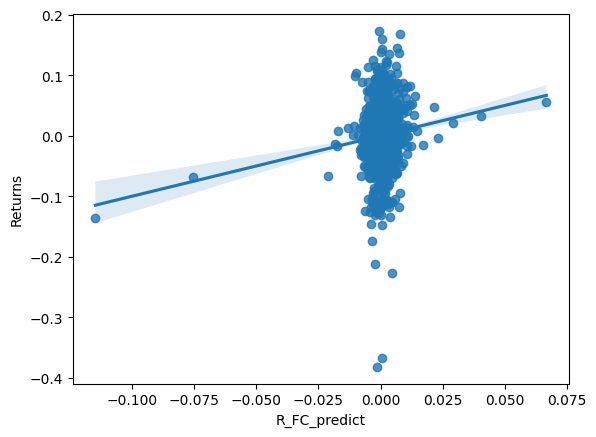

In [291]:
# OLS 회귀모델 적합
model = sm.OLS(Returns, sm.add_constant(X))
result = model.fit()

# HC1 표준 오차를 사용하여 결과 다시 계산
result_robust = result.get_robustcov_results(cov_type='HC1')

# 수정된 결과 출력
print(result_robust.summary())

# 예측값 계산 및 그래프 그리기
R_FC_predict_robust = result_robust.predict()
sns.regplot(x=R_FC_predict_robust, y=Returns, fit_reg=True)
plt.xlabel("R_FC_predict")
plt.ylabel("Returns")
plt.show()

c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

선택된 변수: []
                            OLS Regression Results                            
Dep. Variable:                 mktrtn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                nan
Time:                        16:56:10   Log-Likelihood:                 3773.4
No. Observations:                2077   AIC:                            -7545.
Df Residuals:                    2076   BIC:                            -7539.
Df Model:                           0                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      0.9

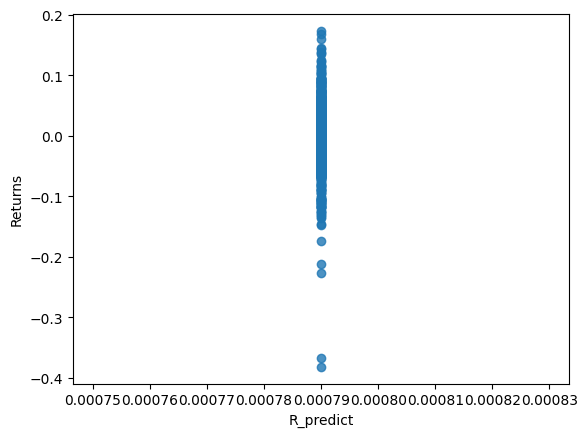

In [293]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso를 사용한 변수 선택
lasso = LassoCV(cv=10, random_state=0).fit(X_scaled, Returns)

# 계수가 0이 아닌 변수 선택
selected_features = np.array(X.columns)[lasso.coef_ != 0]
print("선택된 변수:", selected_features)

# 선택된 변수만을 포함하는 데이터프레임 생성
X_selected = X[selected_features]

# OLS 회귀모델 적합
model_selected = sm.OLS(Returns, sm.add_constant(X_selected))
result_selected = model_selected.fit()

# HC1 표준 오차를 사용하여 결과 다시 계산
result_selected_robust = result_selected.get_robustcov_results(cov_type='HC1')

# 수정된 결과 출력
print(result_selected_robust.summary())

# 예측값 계산 및 그래프 그리기
R_FC_predict_selected = result_selected_robust.predict()
sns.regplot(x=R_FC_predict_selected, y=Returns, fit_reg=True)
plt.xlabel("R_predict")
plt.ylabel("Returns")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 mktrtn   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.624
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.92e-11
Time:                        13:17:16   Log-Likelihood:                 3819.6
No. Observations:                2076   AIC:                            -7595.
Df Residuals:                    2054   BIC:                            -7471.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0135      0.002     -6.563

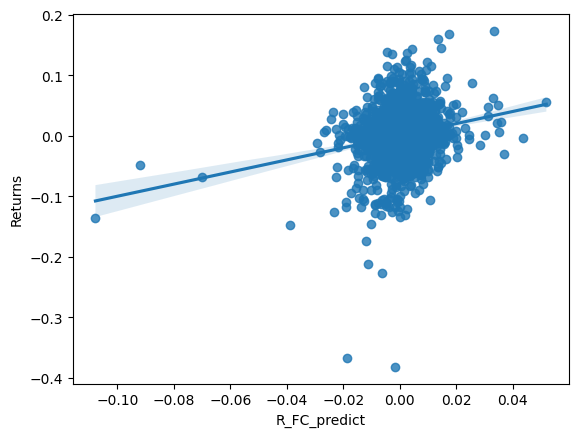

In [112]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 독립변수 설정 및 한 시점 이동 (shift 적용)
X_shifted = merged_df[['BMSv', 'BMSe', 'prrtn_v', 'prrtn_e', 'maxprrtn_v', 'MMLe',
                       'momrtn_v', 'momrtn_e', 'tvolrtn_v', 'tvolrtn_e', 'stvolrtn_v',
                       'stvolrtn_e', 'volrtn_v', 'volrtn_e', 'CSZv', 'CMOMv', 'CSZe', 'CMOMe']].shift(1)

# shift를 적용하지 않을 변수들
X_no_shift = merged_df[['score_full', 'score_title', 'score_content']]

# 두 데이터프레임을 결합
X_combined = pd.concat([X_shifted, X_no_shift], axis=1)

# 결측값 제거
X_combined = X_combined.dropna()
Returns = Returns[X_combined.index]

# OLS 회귀모델 적합
model = sm.OLS(Returns, sm.add_constant(X_combined))
result = model.fit()

# 결과 출력
print(result.summary())

# 예측값 계산 및 그래프 그리기
R_FC_predict = result.predict()
sns.regplot(x=R_FC_predict, y=Returns, fit_reg=True)
plt.xlabel("R_FC_predict")
plt.ylabel("Returns")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 mktrtn   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     16.27
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           8.51e-55
Time:                        13:18:21   Log-Likelihood:                 3819.6
No. Observations:                2076   AIC:                            -7595.
Df Residuals:                    2054   BIC:                            -7471.
Df Model:                          21                                         
Covariance Type:                  HC1                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0135      0.003     -5.125

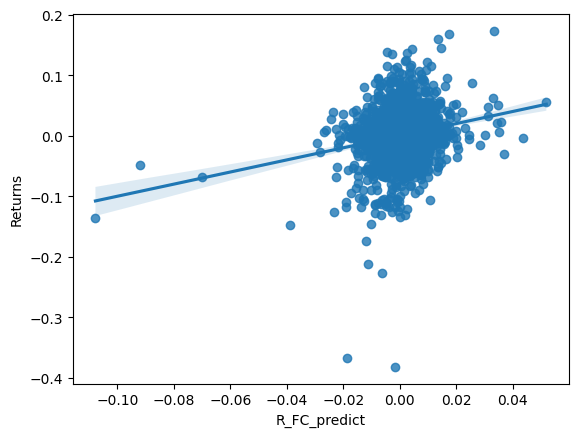

In [115]:
# OLS 회귀모델 적합
model = sm.OLS(Returns, sm.add_constant(X_combined))
result = model.fit()

# HC1 표준 오차를 사용하여 결과 다시 계산
result_robust = result.get_robustcov_results(cov_type='HC1')

# 수정된 결과 출력
print(result_robust.summary())

# 예측값 계산 및 그래프 그리기
R_FC_predict_robust = result_robust.predict()
sns.regplot(x=R_FC_predict_robust, y=Returns, fit_reg=True)
plt.xlabel("R_FC_predict")
plt.ylabel("Returns")
plt.show()


c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

선택된 변수: ['maxprrtn_v' 'momrtn_v' 'tvolrtn_v' 'CMOMv' 'score_full']
                            OLS Regression Results                            
Dep. Variable:                 mktrtn   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     53.21
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.32e-52
Time:                        13:30:13   Log-Likelihood:                 3899.0
No. Observations:                2077   AIC:                            -7786.
Df Residuals:                    2071   BIC:                            -7752.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

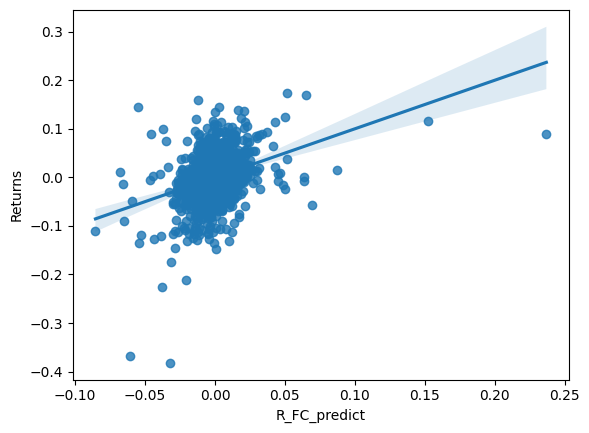

In [124]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# 변수 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso를 사용한 변수 선택
lasso = LassoCV(cv=5, random_state=0).fit(X_scaled, Returns)

# 계수가 0이 아닌 변수 선택
selected_features = np.array(X.columns)[lasso.coef_ != 0]
print("선택된 변수:", selected_features)

# 선택된 변수만을 포함하는 데이터프레임 생성
X_selected = X[selected_features]

# OLS 회귀모델 적합
model_selected = sm.OLS(Returns, sm.add_constant(X_selected))
result_selected = model_selected.fit()

# 결과 출력
print(result_selected.summary())

# 예측값 계산 및 그래프 그리기
R_FC_predict_selected = result_selected.predict()
sns.regplot(x=R_FC_predict_selected, y=Returns, fit_reg=True)
plt.xlabel("R_FC_predict")
plt.ylabel("Returns")
plt.show()


In [85]:
for i, date_str in enumerate(sentiment['date']):
    try:
        # 날짜 변환 시도
        pd.to_datetime(date_str)
    except ValueError:
        # 오류 발생 시 인덱스와 값을 출력
        print(f"오류가 발생한 행: 인덱스 {i}, 값 {date_str}")

In [81]:
# combined_df의 날짜 샘플 확인
print("combined_df 'date' 샘플:")
print(combined_df['date'].head())

# sentiment의 날짜 샘플 확인
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
print("\nsentiment 'date' 샘플:")
print(sentiment['date'].head())

combined_df 'date' 샘플:
2013-04-28   2013-04-28
2013-04-29   2013-04-29
2013-04-30   2013-04-30
2013-05-01   2013-05-01
2013-05-02   2013-05-02
Name: date, dtype: datetime64[ns]

sentiment 'date' 샘플:
0   2017-11-10
1   2017-11-11
2   2017-11-12
3   2017-11-13
4   2017-11-14
Name: date, dtype: datetime64[ns]


In [5]:
data['score_title'] = pd.to_numeric(data['score_title'], errors='coerce')
data['score'] = pd.to_numeric(data['score'], errors='coerce')
data['score_content'] = pd.to_numeric(data['score_content'], errors='coerce')

In [32]:
score_stats = data['score'].describe()
score_title_stats = data['score_title'].describe()
score_content_stats = data['score_content'].describe()

In [33]:
comparison_df = pd.concat([score_stats, score_title_stats, score_content_stats], axis=1, keys=['score', 'score_title', 'score_content'])
print(comparison_df)


            score  score_title  score_content
count  322.000000   322.000000     322.000000
mean    -0.001242     0.030745       0.039130
std      0.420501     0.473686       0.344457
min     -1.000000    -1.000000      -1.000000
25%      0.000000     0.000000       0.000000
50%      0.000000     0.000000       0.000000
75%      0.000000     0.000000       0.000000
max      1.000000     1.000000       1.000000


In [35]:
negative_score_rows = data[(data['score'] < 0) & (data['score_title'] >= 0) & (data['score_content'] >= 0)]
negative_score_rows

,Unnamed: 0,Unnamed: 0.1,UTC-date,UTC-time,title,content,press,link,score_content,score,score_title
53,53,21377,2023-06-06,2023-06-06 8:54,'첩첩산중' 바이낸스…CFTC 이어 SEC도 법적 조치 나서,"SEC, CFTC 이어 바이낸스 제소…""증권법 위반""""창펑 자오 대표, 거래량 조작...",한국경제,https://n.news.naver.com/mnews/article/015/000...,0.0,-1.0,0.0
70,70,21394,2023-06-07,2023-06-07 1:52,가상자산 옥죄는 美…바이낸스 이어 코인베이스 제소(종합),"SEC ""미등록 중개업체 역할""전날 바이낸스·CEO도 소송코인베이스 이틀새 20% ...",6면 TOP,https://n.news.naver.com/mnews/article/277/000...,0.0,-1.0,0.5
106,106,21430,2023-06-11,2023-06-11 2:55,FOMC 앞두고 비트코인·이더리움 약세,"비트코인 2%, 이더리움 4% 하락도지코인 -11% 등 알트코인 하락폭 커SEC 전...",이데일리,https://n.news.naver.com/mnews/article/018/000...,0.5,-1.0,0.0
152,152,21476,2023-06-14,2023-06-14 12:06,"'입출금 중단' 하루인베스트 ""문제 일으킨 파트너사는 B&S홀딩스""","""B&amp;S 홀딩스 상대로 법적 대응""B&amp;S 홀딩스, 파산한 거래소 FT...",뉴스1언론사 선정,https://n.news.naver.com/mnews/article/421/000...,0.0,-1.0,0.0


In [36]:
negative_score_rows.to_csv('negative_score_rows_june2023.csv', encoding='utf-8-sig')

In [7]:
print(data['score_title'].dtype)


float64


In [6]:
bitcoin = pd.read_csv('bitcoin_krw.csv', index_col=0)
bitcoin

,date,open,high,low,close,volume,value,currency,수익률
0,2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,KRW-BTC,NaN
1,2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,KRW-BTC,-0.000231
2,2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,KRW-BTC,0.074885
3,2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,KRW-BTC,-0.015363
4,2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,KRW-BTC,0.015363
...,...,...,...,...,...,...,...,...,...
2182,2023-09-16 09:00:00,35907000.0,36051000.0,35800000.0,35938000.0,2192.885125,7.875507e+10,KRW-BTC,0.000278
2183,2023-09-17 09:00:00,35939000.0,35996000.0,35650000.0,35758000.0,2014.744093,7.210203e+10,KRW-BTC,-0.005021
2184,2023-09-18 09:00:00,35758000.0,36801000.0,35658000.0,36000000.0,3943.417510,1.427953e+11,KRW-BTC,0.006745
2185,2023-09-19 09:00:00,36000000.0,36820000.0,35750000.0,36500000.0,3097.748505,1.124439e+11,KRW-BTC,0.013793


In [7]:
from datetime import datetime

# Convert the 'date' column to a datetime format if it isn't already
bitcoin['date'] = pd.to_datetime(bitcoin['date'])

# Keep only the date portion
bitcoin['date'] = bitcoin['date'].dt.date

# Convert string dates to datetime.date objects for comparison
start_date = datetime.strptime('2023-06-01', '%Y-%m-%d').date()
end_date = datetime.strptime('2023-07-03', '%Y-%m-%d').date()

# Filter rows for June 2023
filtered_data = bitcoin[(bitcoin['date'] >= start_date) & (bitcoin['date'] < end_date)]

filtered_data

,date,open,high,low,close,volume,value,currency,수익률
2075,2023-06-01,36391000.0,36509000.0,35715000.0,35823000.0,3403.840081,1.225855e+11,KRW-BTC,-0.015731
2076,2023-06-02,35823000.0,36150000.0,35470000.0,36089000.0,3129.382447,1.123631e+11,KRW-BTC,0.007398
2077,2023-06-03,36089000.0,36102000.0,35801000.0,35888000.0,1925.565561,6.922122e+10,KRW-BTC,-0.005585
2078,2023-06-04,35888000.0,36146000.0,35820000.0,35865000.0,1679.790548,6.034128e+10,KRW-BTC,-0.000641
2079,2023-06-05,35894000.0,35896000.0,33825000.0,34298000.0,6815.063125,2.374543e+11,KRW-BTC,-0.044675
2080,2023-06-06,34299000.0,35993000.0,33580000.0,35852000.0,5402.995691,1.866340e+11,KRW-BTC,0.044312
2081,2023-06-07,35855000.0,35993000.0,34797000.0,34952000.0,4520.054910,1.596646e+11,KRW-BTC,-0.025424
2082,2023-06-08,34953000.0,35416000.0,34802000.0,34996000.0,2370.319951,8.300358e+10,KRW-BTC,0.001258
2083,2023-06-09,34996000.0,35161000.0,34802000.0,34865000.0,2335.692703,8.164586e+10,KRW-BTC,-0.003750
2084,2023-06-10,34865000.0,34914000.0,33842000.0,34372000.0,6040.928715,2.068005e+11,KRW-BTC,-0.014241


In [9]:
filtered_data = filtered_data[['date', '수익률']]
# filtered_data['lagged_수익률'] = filtered_data['수익률'].shift(-1)
filtered_data

,date,수익률
2075,2023-06-01,-0.015731
2076,2023-06-02,0.007398
2077,2023-06-03,-0.005585
2078,2023-06-04,-0.000641
2079,2023-06-05,-0.044675
2080,2023-06-06,0.044312
2081,2023-06-07,-0.025424
2082,2023-06-08,0.001258
2083,2023-06-09,-0.003750
2084,2023-06-10,-0.014241


In [26]:
grouped_df = data.groupby('UTC-date')['score_content'].mean().reset_index()
grouped_df = grouped_df.rename(columns={'UTC-date': 'date'})
grouped_df['lagged_score_1'] = grouped_df['score_content'].shift(1)
grouped_df['lagged_score_2'] = grouped_df['score_content'].shift(2)
grouped_df['lagged_score_3'] = grouped_df['score_content'].shift(3)
grouped_df

,date,score_content,lagged_score_1,lagged_score_2,lagged_score_3
0,2023-06-01,0.083333,NaN,NaN,NaN
1,2023-06-02,0.178571,0.083333,NaN,NaN
2,2023-06-03,0.125000,0.178571,0.083333,NaN
3,2023-06-04,0.055556,0.125000,0.178571,0.083333
4,2023-06-05,0.000000,0.055556,0.125000,0.178571
5,2023-06-06,-0.333333,0.000000,0.055556,0.125000
6,2023-06-07,0.000000,-0.333333,0.000000,0.055556
7,2023-06-08,0.000000,0.000000,-0.333333,0.000000
8,2023-06-09,0.000000,0.000000,0.000000,-0.333333
9,2023-06-10,0.000000,0.000000,0.000000,0.000000


In [27]:
# Convert 'date' columns to datetime.date in both DataFrames
grouped_df['date'] = pd.to_datetime(grouped_df['date']).dt.date
filtered_data['date'] = pd.to_datetime(filtered_data['date']).dt.date

# Merge the two DataFrames based on the 'date' column
merged_df = pd.merge(grouped_df, filtered_data, on='date')
merged_df = merged_df.drop([0, 1, 2])
merged_df

<ipython-input-27-0042aece0dff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date']).dt.date


,date,score_content,lagged_score_1,lagged_score_2,lagged_score_3,수익률
3,2023-06-04,0.055556,0.125000,0.178571,0.083333,-0.000641
4,2023-06-05,0.000000,0.055556,0.125000,0.178571,-0.044675
5,2023-06-06,-0.333333,0.000000,0.055556,0.125000,0.044312
6,2023-06-07,0.000000,-0.333333,0.000000,0.055556,-0.025424
7,2023-06-08,0.000000,0.000000,-0.333333,0.000000,0.001258
8,2023-06-09,0.000000,0.000000,0.000000,-0.333333,-0.003750
9,2023-06-10,0.000000,0.000000,0.000000,0.000000,-0.014241
10,2023-06-11,-0.150000,0.000000,0.000000,0.000000,-0.000786
11,2023-06-12,-0.083333,-0.150000,0.000000,0.000000,-0.008362
12,2023-06-13,0.184615,-0.083333,-0.150000,0.000000,-0.004296


In [31]:
import statsmodels.api as sm

# 2. Prepare the data
X = merged_df['lagged_score_3']  
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = merged_df['수익률']

# 3. Fit an OLS regression model
model = sm.OLS(y, X).fit()

# 4. Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    수익률   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9286
Date:                Sun, 08 Oct 2023   Prob (F-statistic):              0.344
Time:                        14:53:12   Log-Likelihood:                 63.565
No. Observations:                  27   AIC:                            -123.1
Df Residuals:                      25   BIC:                            -120.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0031      0.005      0.